# Project OFDMA MACS207b

- Tancrède Martinez

- Selyan Chergui

### Model


#### a. Number of subcarriers needed to communicate
Let N(x) be the number of subcarriers needed by a user located at x, who wants to communicate at rate $C$, the number of subcarriers needed $N(x)$ is given by:

$$
N(x)=\lceil \frac{C}{W \log_2\left(1+\frac{K}{{\lVert x \rVert}^\gamma}\right)} \rceil \ \ \text{if} \ \ K \lVert x \rVert^{-\gamma} >\text{SNR}_{min}
$$

Also the number of slots per user is bounded by: 

$$ N_{max} = \lceil \frac{C}{W \log_2\left(1+\text{SNR}_{min}\right)} \rceil $$

#### b. Distribution of the users
We consider that users are represented by a Poisson process of intensity measure $λ dx$ and that there is a percentage $p$ of active users in a timeslot.   
The access point is located at $(0, 0)$. The observation window is a circle of radius $R$.


### Questions

Before starting, quick computation give that $ K \lVert x \rVert^{-\gamma} >\text{SNR}_{min} $ if and only if $\lVert x \rVert \geq 316$

Hence R is lower than this bound we will not have to consider different case in our computation.

### 1. Show that the process of active customers is a Poisson process. Give its intensity measure.

Let $\mathcal{B}((0,0),R)$ denote the disk of center (0,0) and of radius R

The process of users is given by $U$ following a Poisson process of intensity measure $\lambda dx$

Then according to our modelisation, the process of active user is given by:

$ \phi= p \circ U $ which by course theorem follow a point poisson process of control measure $\sigma =p \lambda dx $ 

### 2. What is the mean number of active customers in the cell ?

$\mathbb{E}[[\phi (\mathcal{B}((0,0),R))] = p \lambda \pi R^2$ hence $\phi (\mathcal{B}((0,0),R)) \sim \mathcal{P}(\sigma(\mathcal{B}((0,0),R))) $

### 3. For k = 1, · · · , Nmax, characterize geometrically the subset of the cell in which all customers require k subcarriers.

$$A_k = \lbrace x \in \phi ,N(x) = k \rbrace $$

Geometrically,  it is $\phi \cap (\mathcal{B}((0,0),x_{k}) \setminus \mathcal{B}((0,0),x_{k-1})) $ with $x_k= (\frac K {2^{\frac C {wk}} -1} )^{\frac 1 \gamma}$ and $x_0=0$, considering $\phi$ as a set of points


So it is the difference of two circles intersected with the set active users

### 4. What is the distribution of A3, the number of customers requiring 3 subcarriers ? 

According to course, $\phi(A_3)$ follow a point poisson process:
$\phi(A_3) \sim \mathcal{P}(\sigma(A_3)) \sim \mathcal{P}(p \lambda \pi(x_3^2 - x_2^2) )$

### 5. Using the Kolmogorov-Smirnov test, how can you corroborate this result by simulation ?

We can confirm this results by simulation by approximating the distribution function and comparing to the poisson distribution function

### 6. Show that F can be written as $F (\phi) = \sum _{k=1}^{N_{max}} k \zeta _k$ where $\zeta _k $ independant following a poisson law

$F (\phi) = \sum _{x \in \phi} N(x) = \sum _{x \in \phi} \sum _{k=1}^{N_{max}} k \mathcal{1}_{N(x)=k} = =  \sum _{k=1}^{N_{max}} k \sum _{x \in \phi}  \mathcal{1}_{N(x)=k} = \sum _{k=1}^{N_{max}} k \phi(A_k)$

According to course, hence $A_i \cap A_j = \emptyset \Rightarrow$ $\phi(A_i)$ and $\phi(A_j)$ are independant and follow poisson distribution of parameter $p \lambda \pi (x_{i}^2 - x_{i-1}^2)$ and $p \lambda \pi (x_{j}^2 - x_{j-1}^2) $

### 7. $\mathbb{E}(e^{\theta X_\mu})=e^{-\mu (1- e^{\theta})}$

We deduce $e^{-K \mu \theta }\mathbb{E}(e^{\theta X_\mu})$ is minimal for $\theta = ln K$ so 

$min_{\theta > 0} e^{-K \mu \theta }\mathbb{E}(e^{\theta X_\mu})= e^{-\mu (K (ln K -1) +1 )}$

### 8. Look for the first K such that $e^{-\mu (K (ln K -1) +1 )} \leq 10^{-4}$ 

i.e $K (ln K -1) \geq \frac {4 ln(10)} \mu - 1$ that we can find using numerical method

Hence we only need to really represent the distribution up to K, knowing that higher value are of really low probability (summing up to $10^{-4}$)

In [ ]:
from numpy import log 
def K(mu,step):
    K=step
    while K*(log(K)-1)-4*log(10)/mu+1<0:
        K+=step
    return K
mu=0.1
step=0.5
print(K(mu,step))

35.5


### 9. Coding Part

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
C= 200*10**3
W= 250*10**3
K= 10**6
gamma= 2.8
R=300
lamb= 0.01
SNR_min= 0.1
p=0.01      
S_min=30
S_max=100

def N_slot(x):
    ''' Compute the number of slot required for an active user at position x'''
    return int(np.floor(C/(W*np.log2(1+K/np.linalg.norm(x)**gamma)))+1)

N_max is : 6


Text(0.5, 1.0, 'Simulation of active users observation')

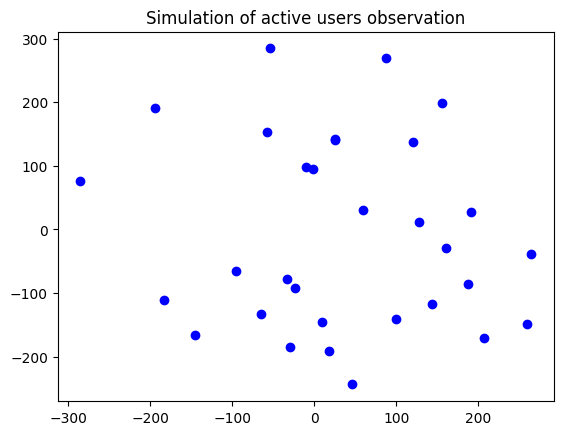

In [ ]:
#Simulation of active user

N_max= int(np.floor(C/(W*np.log2(1+SNR_min)))+1)
print('N_max is :' ,N_max)

def active_user(lamb,p,R):
    ''' Return a simulation of the number of observed active user with given parameters lamb, p and an observation radius R'''
    N=[]
    M=np.random.poisson(np.pi*R**2*p*lamb)
    for i in range(M):
        #Simulation of uniform law over the disk according to https://rh8liuqy.github.io/Uniform_Disk.html
        U_1= np.random.random()
        U_2= np.random.random()
        X,Y= R*np.sqrt(U_2)*np.cos(2*np.pi*U_1), R*np.sqrt(U_2)*np.sin(2*np.pi*U_1)
        N.append(np.array([X,Y]))
    return np.array(N)


# Example of a user distribution
N=active_user(lamb,p,R)
plt.plot(N[:,0],N[:,1],'bo')
plt.title('Simulation of active users observation')

In [ ]:
def generate_ksi(lamb,p,R):
    ''' Return an array representing [ksi_1, ksi_2 , ... , ksi_Nmax]'''
    ksi_arr=np.zeros(N_max)
    N_user=active_user(lamb,p,R)
    for user in N_user:
        try:
            ksi_arr[N_slot(user)-1]+=1
        except:
            print(N_slot(user)-1-N_user)
    return ksi_arr


n_iter=10000
mean_ksi=np.zeros(N_max)
ksi_arr=np.zeros((n_iter,N_max))
for i in range(n_iter):
    ksi=generate_ksi(lamb,p,R)
    mean_ksi+=ksi
    ksi_arr[i]=ksi
mean_ksi/=n_iter
print('Empirical mean of ksi is : ', mean_ksi )
K_=int(np.max(np.max(ksi_arr)))+1
print('Supremum of dimension : ',K_)


Empirical mean of ksi is :  [7.515 6.198 5.093 4.762 4.436 0.248]
Supremum of dimension :  22


In [ ]:
#ksi distribution computation
ksi_distrib=np.zeros((N_max,K_))
for ksi in ksi_arr:
    for i in range(N_max):
        #P(ksi_k = j) = ksi_distrib[k][j]
        ksi_distrib[i][int(ksi[i])]+=1
ksi_distrib/=n_iter

i=5
print('Empirical distribution of ksi ' + str(i) +' : ',ksi_distrib[i])

Empirical distribution of ksi 5 :  [0.779 0.197 0.021 0.003 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]


In [ ]:
#F distribution computation
F_distrib=np.zeros(N_max*K_)
for ksi in ksi_arr:
    F_distrib[int(np.sum([i*ksi[i] for i in range(N_max)]))]+=1
F_distrib/=n_iter

print('Empirical distribution of F : ' ,F_distrib)

Empirical distribution of F :  [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.001 0.001 0.    0.001 0.002 0.001
 0.008 0.002 0.002 0.005 0.005 0.006 0.014 0.012 0.011 0.013 0.011 0.016
 0.022 0.03  0.021 0.022 0.023 0.024 0.028 0.025 0.036 0.026 0.032 0.036
 0.044 0.023 0.045 0.033 0.037 0.035 0.032 0.02  0.023 0.025 0.023 0.021
 0.022 0.018 0.015 0.015 0.016 0.016 0.013 0.009 0.012 0.012 0.015 0.006
 0.003 0.002 0.002 0.006 0.002 0.002 0.004 0.002 0.003 0.002 0.    0.003
 0.    0.001 0.001 0.001 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]


In [ ]:
non_outage_prob= 0.99
S=0
cumul_prob=0
i=0
while cumul_prob<non_outage_prob and i<N_max*K_+1:
    S=i
    cumul_prob+=F_distrib[i]
    i+=1

print('We need approximately',S, 'slots if we want to cover slots demand with a probability of 0.99')


We need approximately 80 slots if we want to cover slots demand with a probability of 0.99
